# Murder victims

Uses data from the 2003, 2008, and 2013 Crime in the US reports

## Caveats
0. No control variable, just using raw murder victim totals

## Working questions
0. Do men and women get murdered at different rates?
0. What age group is most often the victim of a murder?

In [80]:
%matplotlib inline
import glob
import pandas as pd

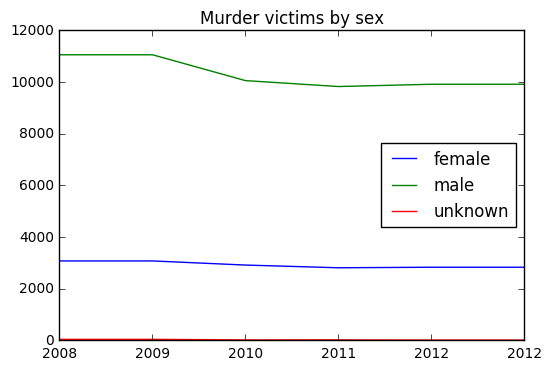

In [81]:
SEX_FILE_MAPPING = {
    '2008': 'cius_data/CIUS2008datatables/08shrtbl01.xls',
    '2009': 'cius_data/CIUS2008datatables/08shrtbl01.xls',
    '2010': 'cius_data/CIUS2010datatables/10shrtbl01.xls',
    '2011': 'cius_data/CIUS2011datatables/SHR Tables 2011/Expanded_Homicide_Data_Table_1_Murder_Victims_by_Race_and_Sex_2011.xls',
    '2012': 'cius_data/cius2012datatables/Expanded_Homicide_Data_Table_1_Murder_Victims_by_Race_and_Sex_2012.xls',
    '2013': 'cius_data/cius2013datatables/Expanded_Homicide_Data_Table_1_Murder_Victims_by_Race_and_Sex_2013.xls'
}

def sex_count_by_year(year):
    file_path = SEX_FILE_MAPPING[year]
    raw = pd.read_excel(file_path)
    data = {
        'male': raw.loc[4][2],
        'female': raw.loc[4][3],
        'unknown': raw.loc[4][4]
    }
    return pd.DataFrame([data], index=[year])

sex_2008 = sex_count_by_year('2008')
sex_2009 = sex_count_by_year('2009')
sex_2010 = sex_count_by_year('2010')
sex_2011 = sex_count_by_year('2011')
sex_2012 = sex_count_by_year('2012')
sex_2013 = sex_count_by_year('2012')
sex = pd.concat([sex_2008, sex_2009, sex_2010, sex_2011, sex_2012, sex_2013])
sex.plot(title='Murder victims by sex')